# Mapping de données avec MetExplore3

# PARTIE A

## Récupération de la liste de gènes essentiels pour Ralstonia solanacearum (Table S1 du papier) puis Extraction des identifiants oldLocusId de la table pour la souche GMI1000.

In [1]:
import pandas as pd

# je définis le chemin du fichier Excel qui contient la liste des gènes essentiels
chemin_fichier_excel = "Genes_essentiels_GMI1000.xlsx"

# je fais préciser le nom de la feuille où se trouve la souche GMI1000
nom_feuille_gmi1000 = "GMI1000"

# Lecture de la feuille GMI1000 dans un tableau pandas
table_genes = pd.read_excel(chemin_fichier_excel, sheet_name=nom_feuille_gmi1000)

# je récupére la colonne oldLocusId
colonne_old_locus = table_genes["oldLocusId"]

# j'enleve les valeurs vides de la colonne et les NA s'il en a
colonne_old_locus_sans_NA = colonne_old_locus.dropna()
colonne_old_locus_sans_NA = colonne_old_locus[colonne_old_locus != "NA"]

# je convertis les identifiants en texte sans les espaces autour
colonne_old_locus_propre = colonne_old_locus_sans_NA.astype(str).str.strip()

# je garde seulement les identifiants uniques puis je les trie
liste_old_locus_unique = sorted(colonne_old_locus_propre.unique())

# j'ouvre un fichier texte pour y écrire la liste d'identifiants
with open("liste_oldLocusId_GMI1000.txt", "w", encoding="utf-8") as fichier_sortie:
    for identifiant in liste_old_locus_unique:     # un identifiant par ligne dans le fichier
        fichier_sortie.write(identifiant + "\n")

# combien d'identifiants différents j'ai extrait
print("Nombre d'identifiants oldLocusId extraits :", len(liste_old_locus_unique))


Nombre d'identifiants oldLocusId extraits : 1035


Ce fichier liste_oldLocusId_GMI1000.txt obtenu me servira ensuite pour le mapping dans MetExplore3.

## Mapping de cette liste sur le BioSource correspondant à la souche GMI1000 de Ralstonia solanacearum dans MetExplore3 (ID iRP1476).

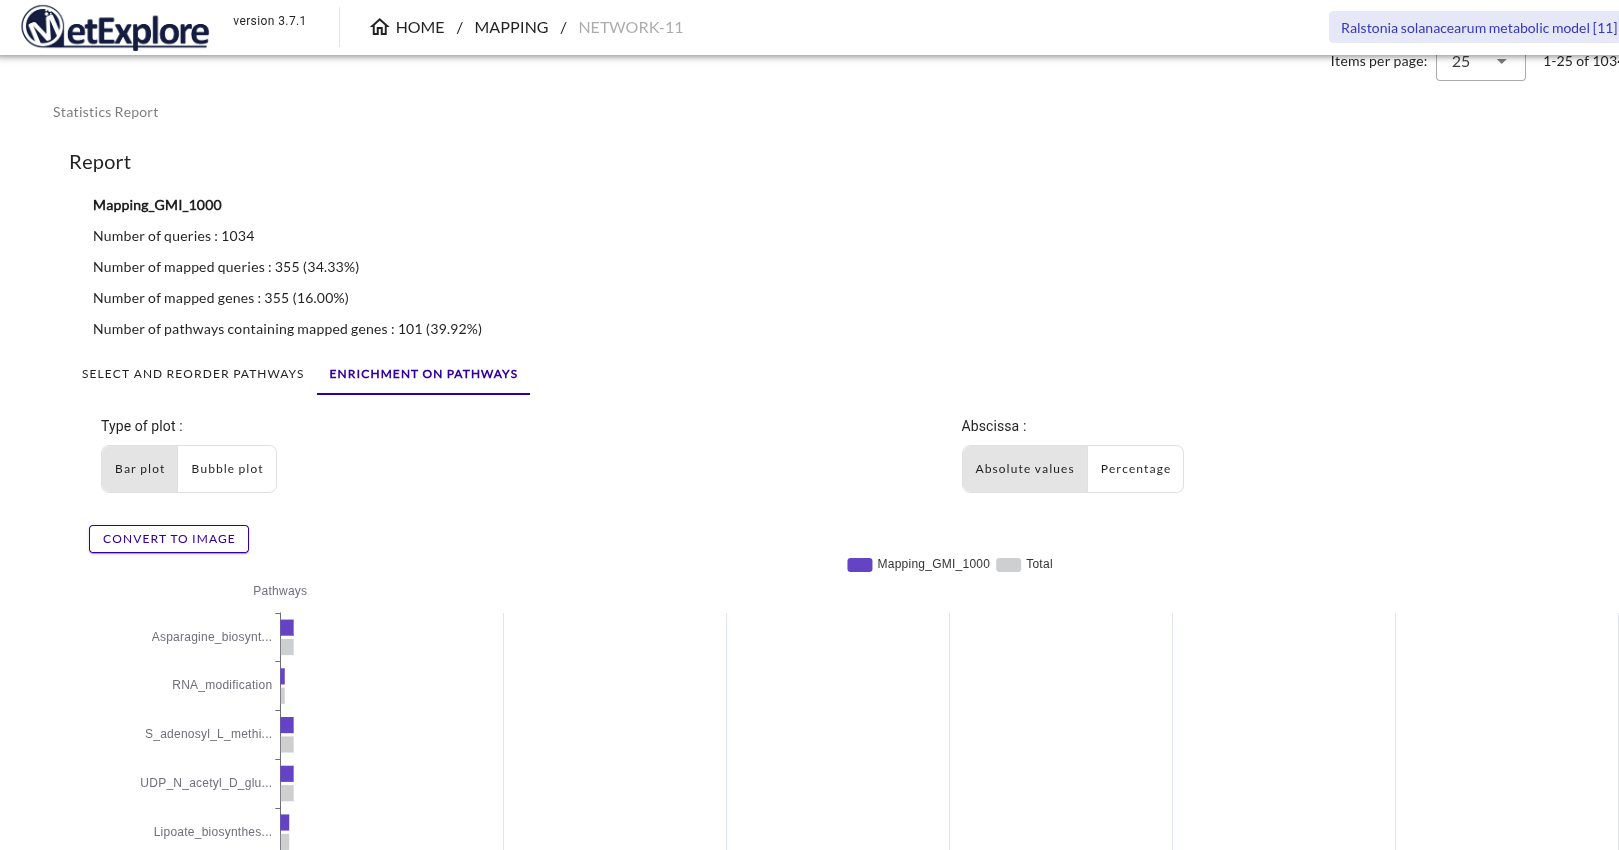

In [3]:
from IPython.display import Image
Image(filename="mapping_GMI_1000_2.png")

L'affichage dans MetExplore

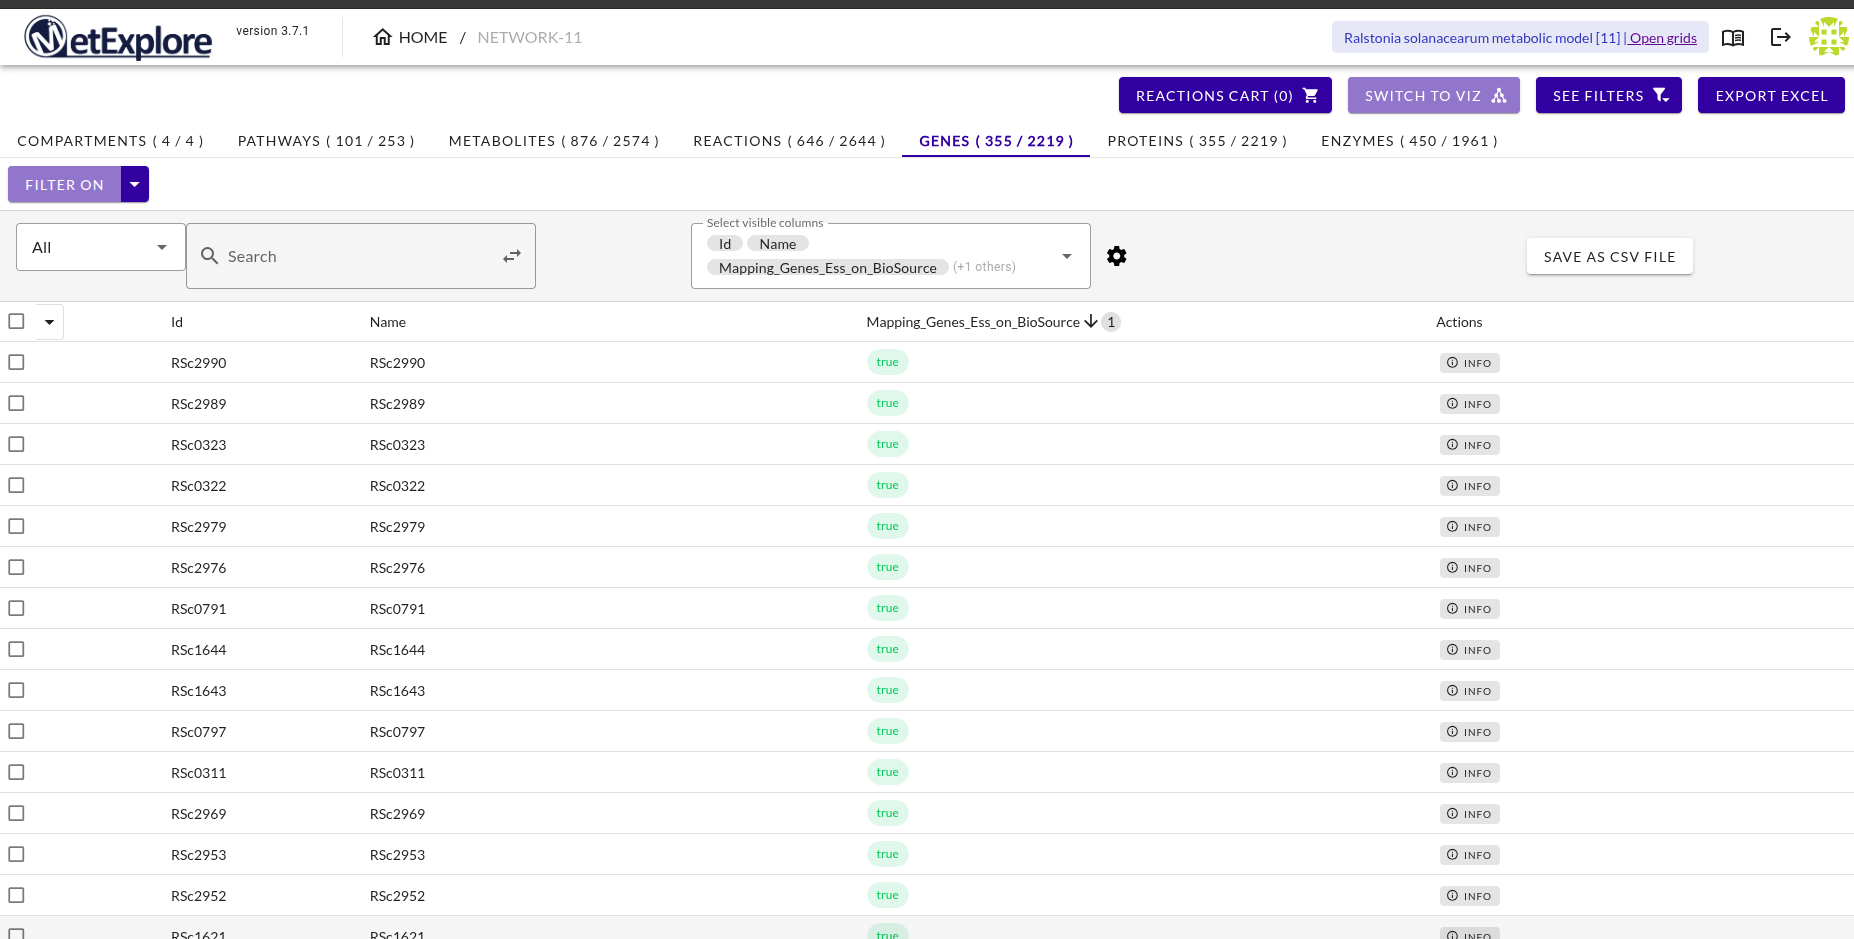

In [3]:
from IPython.display import Image
Image(filename="mapping_GMI_1000.png")

Proportion de gènes essentiels mappés dans chaque voies 

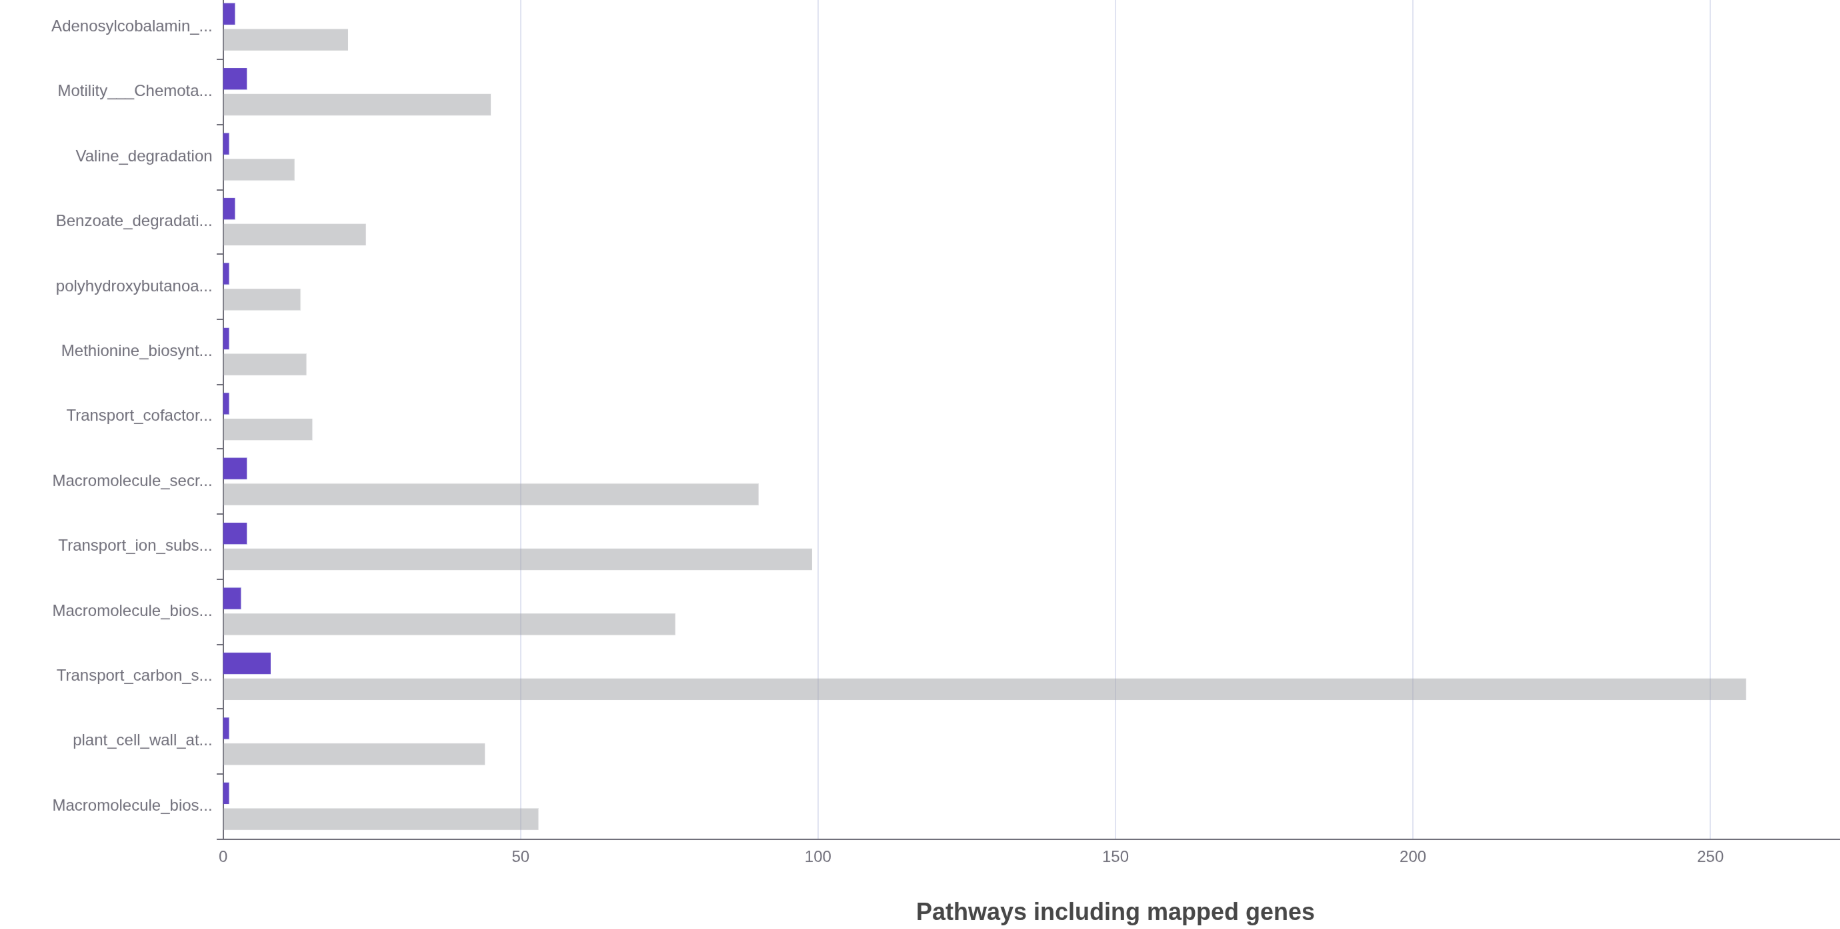

In [4]:
from IPython.display import Image
Image(filename="mapping_GMI_1000_plot_end.png")

Juste la fin du plot inialement tres long

### Question 1 Interpréter la différence (gènes extraits vs gènes mappés):

D’après le rapport de MetExplore3 suite au Mapping, on voit qu’on a soumis 1034 identifiants de gènes essentiels mais que seulement 355 requêtes ont été mappées (environ 34%) et que ces 355 gènes ne représentent qu’environ 16 % des gènes du modèle métabolique (355/2219). Cette différence s’explique d’abord biologiquement : la liste de genes essentiels du papier ne contient pas uniquement des gènes métaboliques, mais aussi des gènes de réplication, transcription, traduction, régulation, structure de la paroi, motilité, systèmes de sécrétion, et autres, qui ne sont pas décrits dans le modèle iRP1476, centré sur le métabolisme et quelques fonctions de transport. 

Ensuite, il y a une analyse bioinformatique : le modèle utilise une certaine annotation qui n’est pas forcément parfaitement superposable à la colonne oldLocusId du tableau (changements d’annotation entre versions, synonymes non pris en compte), ce qui fait que certains gènes présents dans le modèle ne sont pas reconnus lors du mapping. 

Enfin, le modèle lui-même est une reconstruction partielle du métabolisme de GMI1000, c'est à dire que certaines voies ou réactions (donc les gènes associés) n’ont jamais été incluses au départ. Au final, les 355 gènes retrouvés correspondraient surtout aux gènes métaboliques bien annotés (voies de biosynthèse, transport), alors que tout le reste de la liste couvre des fonctions essentielles pour la vie de la bactérie mais qui sortent du périmètre du réseau métabolique utilisé.

# PARTIE B. Filtre et extraction d’un premier sous-réseau

Pour identifier les voies métaboliques les plus impliquées, je me suis appuyé sur les métriques fournies par MetExplore après le mapping des gènes essentiels (nombre de gènes mappés, pourcentage de gènes mappés et surtout **les différentes p-values d’enrichissement**). J’ai ensuite appliqué un filtre en ne conservant (les selectionner) que les **34 pathways** présentant une p-value corrigée < 0,05, ce qui permet de retenir les voies significativement enrichies en gènes essentiels. 
Les captures ci-dessous illustrent cette sélection dans l’interface de MetExplore.

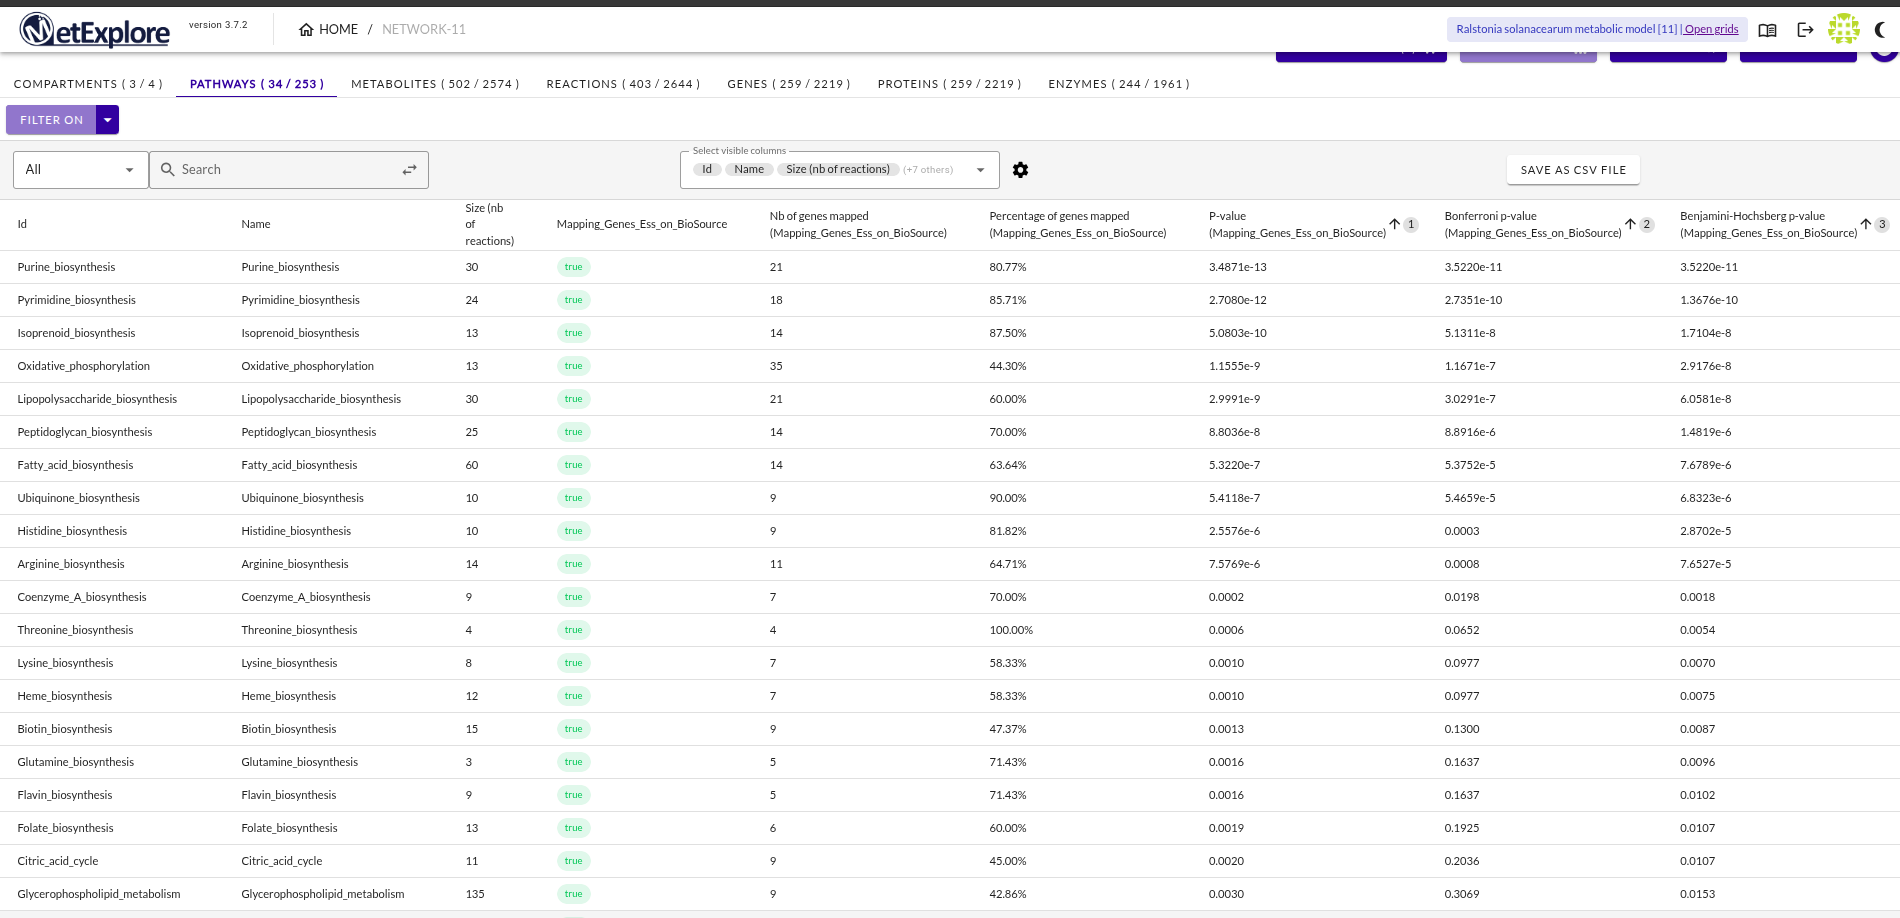

In [1]:
from IPython.display import Image
Image(filename="voie_metab1.png")

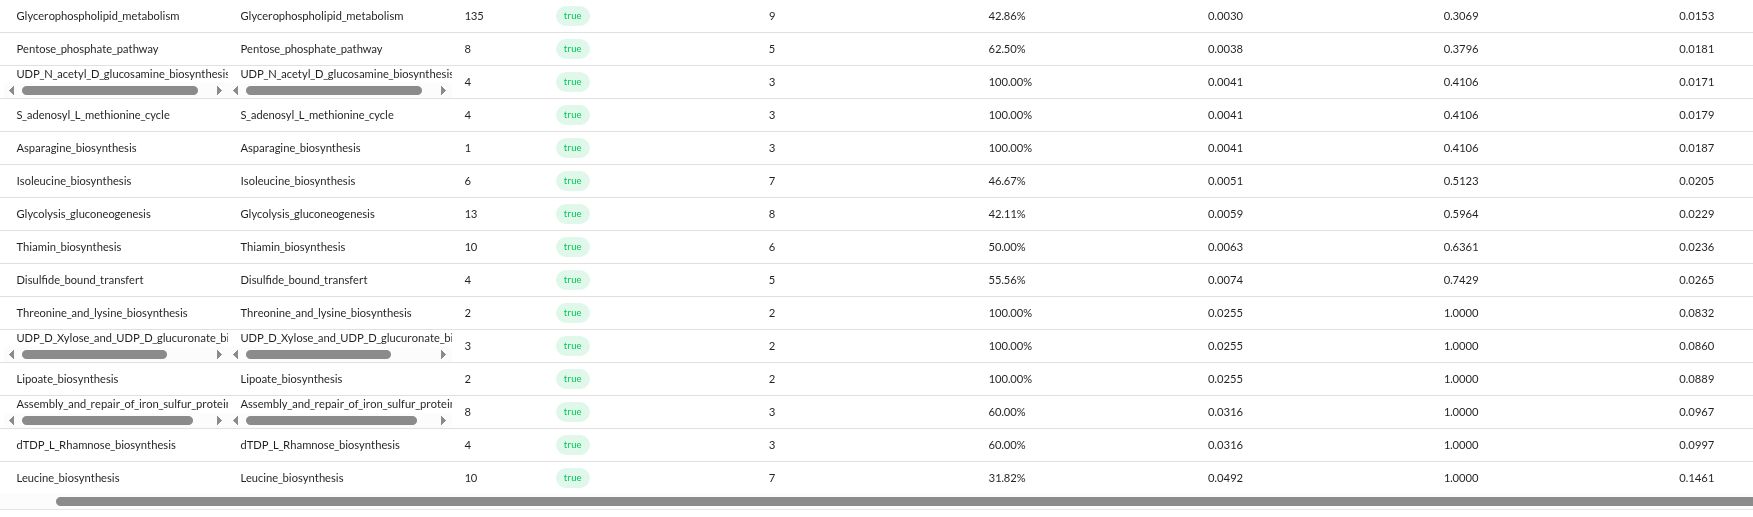

In [2]:
from IPython.display import Image
Image(filename="voie_metab2.png")

Oui, mes 34 voies métaboliques me paraissent cohérentes avec l’article. Pour m’en convaincre, je commence par lire la partie “Ralstonia require multiple envelope-associated genes for fitness in xylem sap” et la figure 3 : les auteurs montrent que des gènes de peptidoglycane (murI), de sécrétion périplasmique (tatC, dsbA) et plusieurs gènes de biosynthèse du  lipopolysaccharide sont indispensables à la fitness en sève de xylème. Cela colle directement avec les voies que j’ai sélectionnées comme enrichies (Peptidoglycan_biosynthesis, Lipopolysaccharide_biosynthesis, voies liées à la membrane), donc je considère que ce bloc de voies associé à l'enveloppe est bien soutenu par l’article. 
Ensuite, je regarde la section “Metabolic functions required for full fitness in xylem sap” et la figure 4 : les auteurs y décrivent que de nombreux gènes de biosynthèse d’acides aminés (Ser, Cys, Met, Phe, Trp, mais aussi His, Arg, Lys) sont nécessaires à la croissance en sève, ce qui correspond très bien à l’enrichissement que j’observe dans mes pathways de type Histidine_biosynthesis,Arginine_biosynthesis, Lysine_biosynthesis, Threonine_biosynthesis, et autre. 
Enfin, je me réfère à la description des gènes essentiels et des cofacteurs (sections sur les gènes essentiels et figure5) où ils insistent sur la nécessité de la biosynthèse de nucléotides et de cofacteurs (thiC, purU, ubiquinone, coenzyme A, heme, folate) pour la fitness en milieu riche et en sève; cela recoupe bien mes voies enrichies de type Purine-pyrimidine_biosynthesis, Ubiquinone_biosynthesis, Coenzyme_A_biosynthesis, Folate_biosynthesis, ou encore Oxidative_phosphorylation. 
En résumé, en parcourant systématiquement ces trois blocs de résultats (enveloppe, acides aminés, cofacteurs ou nucléotides) et en reliant les gènes cités aux noms de voies sur MetExplore, je trouve une bonne correspondance entre les pathways statistiquement enrichies dans mon mapping et les grandes fonctions que l’article identifie comme critiques pour la fitness de Ralstonia dans la sève de xylème.

# PARTIE C. Visualisation du sous-réseau

## Question 3 : Quelle est la voie métabolique qui fait le lien entre les compartiments périplasme et milieu extracellulaire ? Réalisez un export de la visualisation (en lien HTML) de ce sous-réseau et ajoutez le compte MetExplore_Training en tant que collaborateur.

j’ai regardé le sous-réseau filtré avec les compartiments affichés, puis je me suis focalisé sur la frontière entre le périplasme et le milieu extracellulaire. J’ai repéré la réaction qui fait passer des métabolites d’un compartiment à l’autre, puis je l'ai sélectionnée pour afficher sa fiche d’information dans un panneau. Dans ce panneau, le champ Pathway indique systématiquement **la voie Lipopolysaccharide_biosynthesis**. J’en conclus que la voie métabolique qui assure la connexion entre le compartiment périplasmique et le milieu extracellulaire dans mon sous-réseau est la biosynthèse du lipopolysaccharide.

Pour l’export HTML, j’ai utilisé le sous-réseau métabolique restreint aux voies enrichies en gènes essentiels (34 pathways sélectionnées), avec les side compounds retirés et les compartiments + pathways affichés. Une fois cette visualisation obtenue, j’ai cliqué sur "EXPORT VISUALISATION", choisi le format HTML, puis enregistré le fichier. Ce fichier correspondant à l’export demandé du sous-réseau d’intérêt à été **partagé avec le compte MetExplore_Training en tant que writer**.

## Question 4 : : Cette voie métabolique semble produire (exporter) un groupe de métabolites particulier. Quel est ce groupe ? Est-ce que ces métabolites vous semblent pertinents dans la stratégie de la bactérie ?

De la visualisation de mon sous-réseau, je vois que la **réaction R_LPSKOabctex** exporte vers le milieu extracellulaire le métabolite **M_Oantigen_core_ko_lipidA_RS_e**, correspondant à un précurseur du lipopolysaccharide (LPS) contenant le core (coeur) et une partie du O-antigène. Dans le modèle, ce métabolite appartient clairement au **groupe des composés lipopolysaccharide de O-antigen**, un ensemble de molécules extérieures essentielles à la structure du feuillet externe de la membrane des bactéries Gram négatives. L’extrusion de ce précurseur est bien cohérente biologiquement, car les O-antigènes doivent être transportés hors de la cellule pour être assemblés puis exposés à la surface, où ils jouent un rôle clé dans la protection et l’interaction avec l’environnement.

En effet, du point de vue biologique, l’article de Lerouge & Vanderleyden (2001) nous explique que l’O-antigène est la région la plus variable du LPS, et qu’il constitue un déterminant majeur d’adaptabilité et de survie des bactéries dans des environnements complexes. Les auteurs soulignent (dans la partie 1.2. Function / 1.2.1. LPS and pathogenesis) notamment que l’O-antigène contribue à :
- la résistance au complément en empêchant le dépôt du MAC (Membrane Attack Complex) trop près de la membrane ;
- la résistance à la phagocytose car les chaînes longues masquent les déterminants reconnus par le système immunitaire ;
- la variation antigénique permettant d’éviter la reconnaissance immunitaire ;
- l’adhésion aux surfaces dans les contextes infectieux ou symbiotiques. Ainsi, l’export du métabolite identifié dans le sous-réseau s’inscrit dans la logique où la bactérie investit dans la synthèse et l’exposition de l’O-antigène afin d'optimiser sa protection, sa flexibilité structurale et sa capacité d’interaction avec l’hôte ou l’environnement.

Enfin, dans la stratégie globale de la bactérie, les métabolites du type core–lipid O-antigen sont essentiels car ils déterminent directement les propriétés de surface, qui conditionnent l’immunité innée, l’attachement, la virulence potentielle ou la symbiose. Les variations décrites dans l’article, de type substitutions, différences de longueur, et autres montrent que ces molécules constituent un levier adaptatif majeur, permettant à la bactérie de s’ajuster aux stress environnementaux (pH, antimicrobiens, défenses immunitaires, conditions du sol ou du microbiote). Dans mon sous-réseau, le fait que ce groupe de métabolites soit exporté confirme donc leur place centrale dans la stratégie d’ajustement régulier de la membrane externe, indispensable pour survivre dans un milieu changeant ou hostile.